<a href="https://colab.research.google.com/github/rivdsilva8/RatRepo/blob/main/CS513FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-ML: Chance

In [ ]:
# borough
# incident zip code
# sightings_count

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('Rat_Sightings.csv')
df.head(n=100)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31475482,09/06/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,2817 BARKER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866851,-73.869184,"(40.86685138722828, -73.86918390331176)"
96,31475486,09/06/2015 12:00:00 AM,08/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11237.0,1395 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698561,-73.920786,"(40.69856103965532, -73.92078598053241)"
97,31475514,09/06/2015 12:00:00 AM,07/15/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10031.0,602 WEST 137 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821555,-73.954544,"(40.82155481156099, -73.95454434550449)"
98,31476080,09/06/2015 12:00:00 AM,10/01/2015 08:45:17 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10464.0,210 CARROLL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.846228,-73.783744,"(40.846228147578806, -73.78374420632285)"


In [ ]:
# map_df = df.loc[:, ['Latitude', 'Longitude']]
# map_df.head()

In [ ]:
unique_zips = df['Incident Zip'].astype('category').unique()
print(len(unique_zips))

192


In [ ]:
# Convert 'Incident Zip' column to string
# print(df.columns)
if 'Incident Zip' in df.columns:
    df = df.dropna(subset=['Incident Zip'])
    df['Incident Zip'] = df['Incident Zip'].astype(int).astype(str)  # Handle NaN by filling with 0
    df = df[df['Incident Zip'].str.len() >= 5]
    print(df['Incident Zip'].head())
else:
    print("'Incident Zip' column not found in the dataset.")


0    10006
1    10306
2    10310
3    11206
4    10462
Name: Incident Zip, dtype: object


In [ ]:
# df['Incident Zip'] = df['Incident Zip'].astype('object')
# print(df.dtypes)
# print(type(df['Incident Zip'][0]))

In [ ]:
df['Created Date']

,Created Date
0,09/04/2015 12:00:00 AM
1,09/04/2015 12:00:00 AM
2,09/04/2015 12:00:00 AM
3,09/04/2015 12:00:00 AM
4,09/04/2015 12:00:00 AM
...,...
101909,02/15/2017 12:00:00 AM
101910,02/14/2017 12:00:00 AM
101911,02/14/2017 12:00:00 AM
101912,02/14/2017 12:00:00 AM


In [ ]:
pd.to_datetime(df['Created Date']).dt.year

<ipython-input-11-247a3faa07a6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['Created Date']).dt.year


,Created Date
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
101909,2017
101910,2017
101911,2017
101912,2017


In [ ]:
if all(col in df.columns for col in ['Incident Zip', 'Latitude', 'Longitude', 'Borough', 'Created Date']):
    # Step 1: Extract the year from the Date column
    df['Year'] = pd.to_datetime(df['Created Date']).dt.year  # Ensure 'Date' is in datetime format, then extract the year
    # print(df['Year'])

    # Step 2: Group data by ZIP code and year, then count the number of sightings
    sightings_per_zip = (
        # df.groupby(['Year'])
        # df.groupby(['Incident Zip'])
        df.groupby(['Incident Zip', 'Year'])
        .agg(
            Latitude=('Latitude', 'first'),          # Use the first occurrence of Latitude
            Longitude=('Longitude', 'first'),        # Use the first occurrence of Longitude
            Borough=('Borough', 'first'),
            Sighting_Count=('Incident Zip', 'size'),  # Count sightings
        )
        .reset_index()  # Convert index back to columns
    )

print(sightings_per_zip)


<ipython-input-12-361c0345f3e3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Created Date']).dt.year  # Ensure 'Date' is in datetime format, then extract the year


     Incident Zip  Year   Latitude  Longitude    Borough  Sighting_Count
0           10000  2014  40.782295 -73.965126  MANHATTAN               1
1           10000  2016  40.782295 -73.965126  MANHATTAN               1
2           10000  2017  40.782295 -73.965194  MANHATTAN               1
3           10001  2010  40.750659 -73.990876  MANHATTAN              15
4           10001  2011  40.749638 -73.999036  MANHATTAN              18
...           ...   ...        ...        ...        ...             ...
1421        11694  2013  40.579029 -73.837834     QUEENS              16
1422        11694  2014  40.569045 -73.864681     QUEENS              11
1423        11694  2015  40.571688 -73.861605     QUEENS               4
1424        11694  2016  40.581190 -73.825103     QUEENS              13
1425        11694  2017  40.568374 -73.863545     QUEENS              11

[1426 rows x 6 columns]


In [ ]:
# Sort the DataFrame by 'Year' in ascending order
sightings_per_zip = sightings_per_zip.sort_values(by=['Incident Zip', 'Year'], ascending=[True, True])

# # If you want to reset the index after sorting, you can do so:
sightings_per_zip = sightings_per_zip.reset_index(drop=True)

# Display the sorted DataFrame
# print(sightings_per_zip)

new_df = sightings_per_zip.loc[:, ['Incident Zip', 'Year', 'Latitude', 'Longitude', 'Borough', 'Sighting_Count']]
print(new_df)

     Incident Zip  Year   Latitude  Longitude    Borough  Sighting_Count
0           10000  2014  40.782295 -73.965126  MANHATTAN               1
1           10000  2016  40.782295 -73.965126  MANHATTAN               1
2           10000  2017  40.782295 -73.965194  MANHATTAN               1
3           10001  2010  40.750659 -73.990876  MANHATTAN              15
4           10001  2011  40.749638 -73.999036  MANHATTAN              18
...           ...   ...        ...        ...        ...             ...
1421        11694  2013  40.579029 -73.837834     QUEENS              16
1422        11694  2014  40.569045 -73.864681     QUEENS              11
1423        11694  2015  40.571688 -73.861605     QUEENS               4
1424        11694  2016  40.581190 -73.825103     QUEENS              13
1425        11694  2017  40.568374 -73.863545     QUEENS              11

[1426 rows x 6 columns]


In [ ]:
new_df['Sighting_Count'].describe()

,Sighting_Count
count,1426.000000
mean,71.217391
std,73.701116
min,1.000000
25%,20.000000
50%,47.000000
75%,97.750000
max,553.000000


In [ ]:
# Step 3: Define the target variable
# Assuming the relevant column is named "Sightings_Count" (adjust to your dataset)
if 'Sighting_Count' in new_df.columns:
    # Define thresholds using quantiles
    bins = [0, 25, 200, 554]
    labels = ['low', 'med', 'high']

    new_df['Rat_Sighting_Chances'] = pd.cut(new_df['Sighting_Count'], bins=bins, labels=labels, right=False)
    # categories, bins = pd.qcut(new_df['Sighting_Count'], q=3, retbins=True)

    # # Print the bin edges
    # print("Bin edges:", bins)

    # # Optionally, see the categories (for reference)
    # print("Categories:", categories.value_counts())
else:
    print("Ensure the dataset contains the expected column for analysis.")

# Step 4: Verify the new column
print(new_df['Rat_Sighting_Chances'].value_counts())
print(new_df['Rat_Sighting_Chances'])

Rat_Sighting_Chances
med     903
low     418
high    105
Name: count, dtype: int64
0       low
1       low
2       low
3       low
4       low
       ... 
1421    low
1422    low
1423    low
1424    low
1425    low
Name: Rat_Sighting_Chances, Length: 1426, dtype: category
Categories (3, object): ['low' < 'med' < 'high']


<ipython-input-16-838c8c4babb6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Rat_Sighting_Chances', palette=color_map)


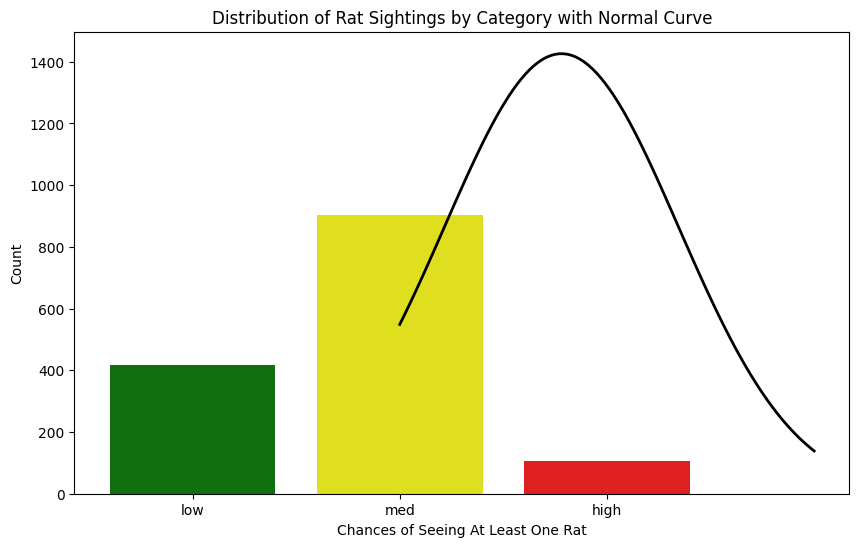

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Step 1: Map the 'Rat_Sighting_Chances' categories to numeric values
category_map = {'low': 1, 'med': 2, 'high': 3} # Assign numeric values for normal distribution
numeric_data = new_df['Rat_Sighting_Chances'].map(category_map)

# Ensure that numeric_data is treated as a float column
numeric_data = numeric_data.astype(float)

# Step 2: Plot the bar plot of categories
plt.figure(figsize=(10, 6))

# Set colors for the categories
color_map = {'low': 'green', 'med': 'yellow', 'high': 'red'}

# Plot the counts of each category
sns.countplot(data=new_df, x='Rat_Sighting_Chances', palette=color_map)

# Step 3: Fit a normal distribution using the numeric values
mean = numeric_data.mean()
std_dev = numeric_data.std()

# Generate points for the x-axis of the normal distribution (aligned with category centers)
# category_centers = [0.5, 1.5, 2.5]
# x = np.linspace(min(category_centers), max(category_centers), 100)
x = np.linspace(min(numeric_data), max(numeric_data), 100)
y = norm.pdf(x, mean, std_dev)

# Step 4: Scale the normal distribution curve to match the plot
plt.plot(x, y * len(numeric_data) / max(y), 'k-', lw=2) # 'k-' is black line, lw=2 is line width

# Step 5: Add titles and labels
plt.title('Distribution of Rat Sightings by Category with Normal Curve')
plt.xlabel('Chances of Seeing At Least One Rat')
plt.ylabel('Count')

# Step 6: Show the plot
plt.show()


# Pre - ML: Rivaldo

# KNN

In [ ]:
# spliting columns to attr and target
attr =new_df[['Incident Zip', 'Year']] # Features
target =new_df['Rat_Sighting_Chances']  # Target

print(attr.head())  # Features
print(target.head())  # Target Class

  Incident Zip  Year
0        10000  2014
1        10000  2016
2        10000  2017
3        10001  2010
4        10001  2011
0    low
1    low
2    low
3    low
4    low
Name: Rat_Sighting_Chances, dtype: category
Categories (3, object): ['low' < 'med' < 'high']


In [ ]:
# Splitting Data to 70 % Train, 30 % Test
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3, random_state = 3, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

,Rat_Sighting_Chances
69,med
919,high
1227,med
595,med
995,med


In [ ]:
# Training KNN Classifer using values 3,5,10 and finding the accuracy of model
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = range(1,16)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    error_rates.append(1 - accuracy)
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')

Accuracy of model with k = 1: 76.4%

Accuracy of model with k = 2: 72.66%

Accuracy of model with k = 3: 78.5%

Accuracy of model with k = 4: 74.53%

Accuracy of model with k = 5: 76.17%

Accuracy of model with k = 6: 77.34%

Accuracy of model with k = 7: 77.8%

Accuracy of model with k = 8: 77.8%

Accuracy of model with k = 9: 75.7%

Accuracy of model with k = 10: 75.47%

Accuracy of model with k = 11: 74.77%

Accuracy of model with k = 12: 75.0%

Accuracy of model with k = 13: 74.07%

Accuracy of model with k = 14: 74.77%

Accuracy of model with k = 15: 73.13%



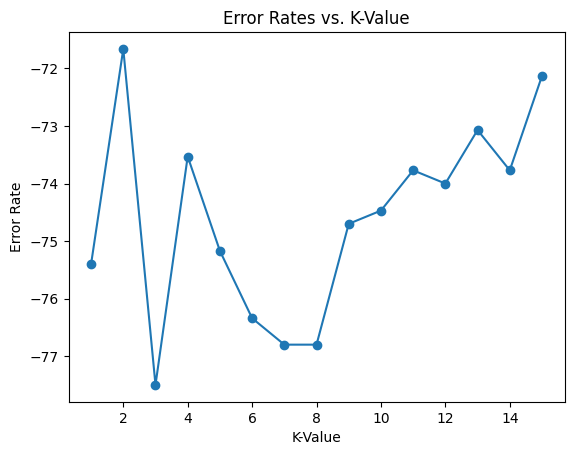

In [ ]:
# Finding the elbow curve

plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. K-Value')
plt.show()

Using the graph we determine the K value at the elbow curve is K=6

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(attr_train, target_train)
target_pred = knn.predict(attr_test)
accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
error_rates.append(1 - accuracy)
print(f'Accuracy of model with k = {6}: {accuracy}%')

Accuracy of model with k = 6: 77.34%


In [ ]:
# Printing Confusion Matrix, Accuracy score and Classification Report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[ 12   0  19]
 [  2  91  34]
 [ 17  25 228]]

Accuracy score
0.7733644859813084

Classification Report
              precision    recall  f1-score   support

        high       0.39      0.39      0.39        31
         low       0.78      0.72      0.75       127
         med       0.81      0.84      0.83       270

    accuracy                           0.77       428
   macro avg       0.66      0.65      0.65       428
weighted avg       0.77      0.77      0.77       428



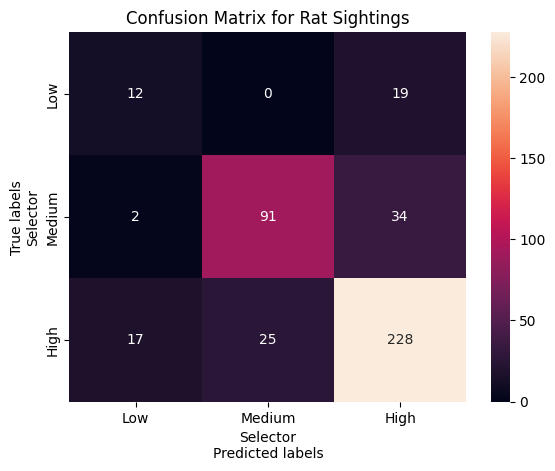

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Selector\nPredicted labels');ax.set_ylabel('True labels\nSelector');
ax.set_title('Confusion Matrix for Rat Sightings');
ax.xaxis.set_ticklabels(['Low', 'Medium','High']);
ax.yaxis.set_ticklabels(['Low', 'Medium','High']);

plt.show()

# Random Forest


In [ ]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()



,Year,Latitude,Longitude,Sighting_Count,Incident Zip_10000,Incident Zip_10001,Incident Zip_10002,Incident Zip_10003,Incident Zip_10004,Incident Zip_10005,...,Incident Zip_11693,Incident Zip_11694,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Rat_Sighting_Chances_low,Rat_Sighting_Chances_med,Rat_Sighting_Chances_high
0,2014,40.782295,-73.965126,1,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,2016,40.782295,-73.965126,1,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,2017,40.782295,-73.965194,1,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,2010,40.750659,-73.990876,15,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,2011,40.749638,-73.999036,18,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


Rat_Sighting_Chances_low  Rat_Sighting_Chances_med  Rat_Sighting_Chances_high
False                     True                      False                        903
True                      False                     False                        418
False                     False                     True                         105
Name: count, dtype: int64
Rat_Sighting_Chances_low  Rat_Sighting_Chances_med  Rat_Sighting_Chances_high
False                     True                      False                        63.323983
True                      False                     False                        29.312763
False                     False                     True                          7.363254
Name: count, dtype: float64


<Axes: xlabel='Rat_Sighting_Chances_low', ylabel='count'>

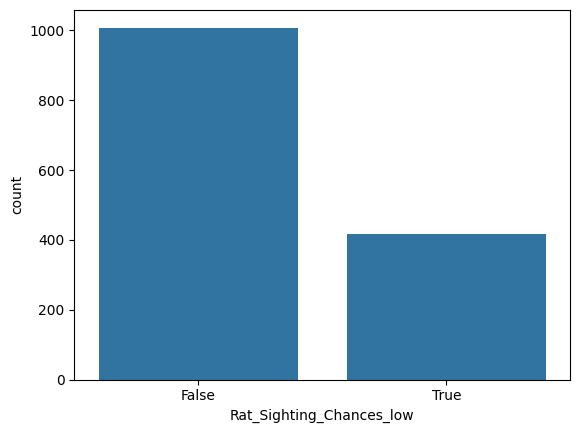

In [ ]:
print(new_df_dummies[['Rat_Sighting_Chances_low','Rat_Sighting_Chances_med','Rat_Sighting_Chances_high']].value_counts())
print( (new_df_dummies[['Rat_Sighting_Chances_low','Rat_Sighting_Chances_med','Rat_Sighting_Chances_high']].value_counts()/ new_df_dummies[['Rat_Sighting_Chances_med','Rat_Sighting_Chances_high']].value_counts().sum()) * 100)
sns.countplot(data=new_df_dummies, x='Rat_Sighting_Chances_low')

<Axes: xlabel='Rat_Sighting_Chances_med', ylabel='count'>

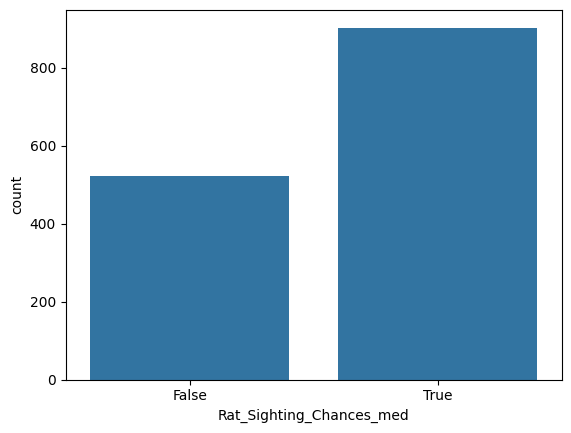

In [ ]:
sns.countplot(data=new_df_dummies, x='Rat_Sighting_Chances_med')

<Axes: xlabel='Rat_Sighting_Chances_high', ylabel='count'>

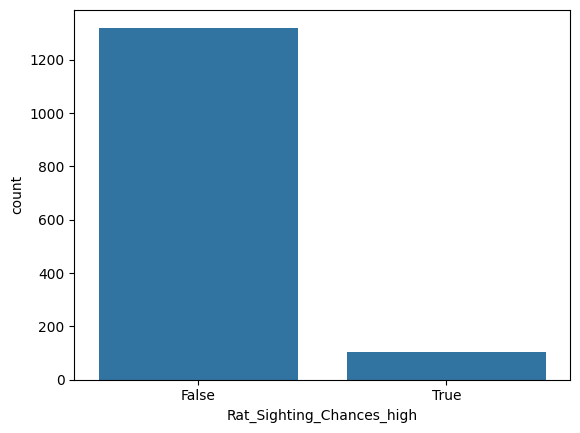

In [ ]:
sns.countplot(data=new_df_dummies, x='Rat_Sighting_Chances_high')

In [ ]:
# spliting columns to attr and target
attr_cols = [col for col in new_df_dummies.columns if col.startswith('Incident Zip_') or col.startswith('Borough_')]
attr_cols.append('Year')
# print(attr_cols)
target_cols = [col for col in new_df_dummies.columns if col.startswith('Rat_Sighting_Chances')]
# print(target_cols)
attr =new_df_dummies[attr_cols] # Features
target =new_df_dummies[target_cols]  # Target

print(attr.head())  # Features
print(target.head())  # Target Class

   Incident Zip_10000  Incident Zip_10001  Incident Zip_10002  \
0                True               False               False   
1                True               False               False   
2                True               False               False   
3               False                True               False   
4               False                True               False   

   Incident Zip_10003  Incident Zip_10004  Incident Zip_10005  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   Incident Zip_10006  Incident Zip_10007  Incident Zip_10009  \
0               False               False               False   
1               False               False               False   
2               False  

In [ ]:
# Train-Test split
attr_train, attr_test, target_train, target_test = \
 train_test_split(attr, target, test_size = 0.3, random_state = 6)

print(f"Attributes (Train):\n{attr_train.head()}\n")
print(f"Attributes (Test):\n{attr_test.head()}\n")
print(f"Target (Train):\n{target_train.head()}\n")
print(f"Target (Test):\n{target_test.head()}\n")

Attributes (Train):
      Incident Zip_10000  Incident Zip_10001  Incident Zip_10002  \
134                False               False               False   
619                False               False               False   
782                False               False               False   
1109               False               False               False   
1054               False               False               False   

      Incident Zip_10003  Incident Zip_10004  Incident Zip_10005  \
134                False               False               False   
619                False               False               False   
782                False               False               False   
1109               False               False               False   
1054               False               False               False   

      Incident Zip_10006  Incident Zip_10007  Incident Zip_10009  \
134                False               False               False   
619                False  

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=7)

# train the model
rf.fit(attr_train, target_train)

# predict the test set
target_pred = rf.predict(attr_test)

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
cr = classification_report(target_test, target_pred)

print(f'Accuracy Score: {(accuracy * 100):.3f}%\n')
print('Classification Report:')
print(cr)

Accuracy Score: 84.346%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       123
           1       0.85      0.94      0.89       268
           2       0.76      0.51      0.61        37

   micro avg       0.86      0.84      0.85       428
   macro avg       0.84      0.73      0.77       428
weighted avg       0.86      0.84      0.84       428
 samples avg       0.84      0.84      0.84       428



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = rf.feature_importances_
print(f"Mean Decrease Accuracy: {mean_decrease_accuracy}")
# Feature importance for Mean Decrease GINI
gini_importance = rf.feature_importances_ * rf.estimators_[0].tree_.impurity[0]
print(f"Mean Decrease GINI: {gini_importance}")

Mean Decrease Accuracy: [2.32208076e-03 1.73081333e-03 4.19034452e-03 5.29423674e-04
 1.41528915e-02 9.73735708e-03 1.48016895e-02 5.68583688e-03
 1.69680232e-03 3.26774087e-03 6.52683302e-04 5.57825235e-04
 8.24967702e-04 7.31737353e-04 5.42970549e-04 1.63559753e-02
 8.75075939e-03 1.02038941e-03 2.73965480e-03 2.01939083e-03
 6.96133687e-04 4.96518407e-04 2.31983278e-03 1.18933915e-02
 2.60075011e-03 1.92103739e-03 5.18577097e-04 2.19624571e-03
 1.20112990e-03 2.34097253e-03 8.54201771e-04 8.58630552e-04
 7.66852297e-04 7.46936847e-04 3.44577937e-03 9.03497042e-04
 1.78260602e-03 6.05604528e-04 5.09599546e-04 5.70429962e-04
 8.15966698e-03 1.40396236e-03 1.20114505e-02 4.87337973e-03
 2.75457462e-03 2.35421759e-03 1.75725814e-03 9.33272726e-03
 2.52859162e-03 0.00000000e+00 1.08608199e-02 1.45081076e-02
 2.56741045e-04 1.37376327e-03 2.40591157e-04 2.99838935e-04
 1.83463248e-04 1.33698722e-04 1.14086718e-02 1.52606503e-03
 6.34514109e-04 7.97850468e-05 1.63939033e-04 4.73645502e-04


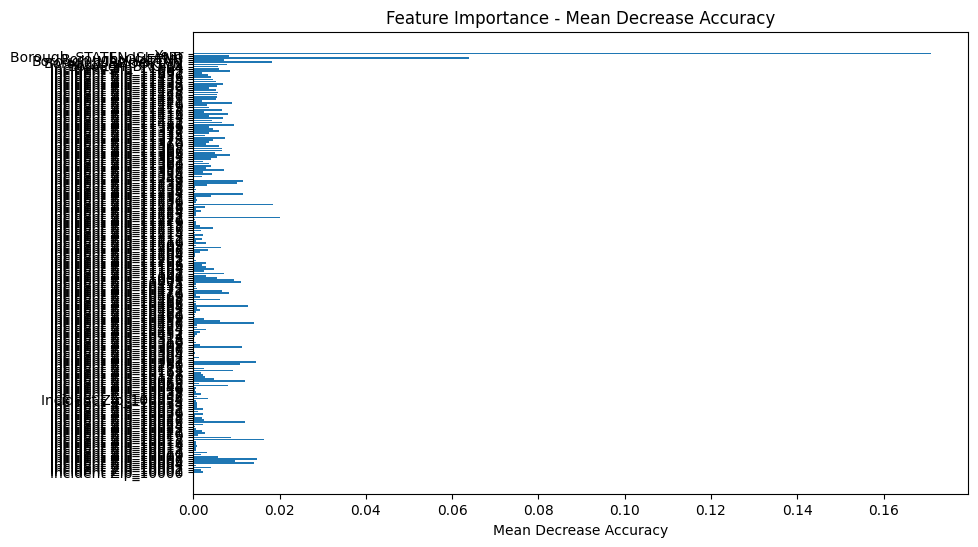

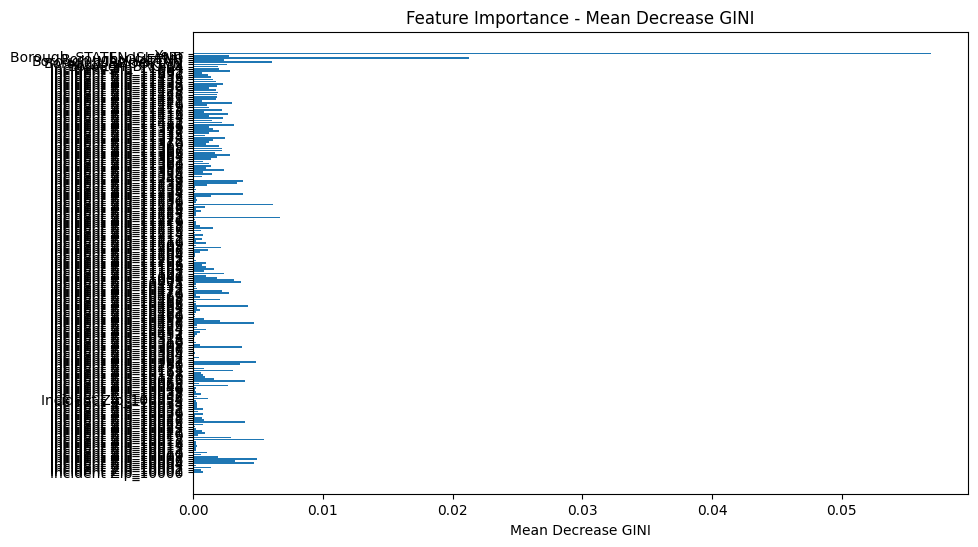

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=attr_train.columns).sort_values(ascending=False)
print(feature_scores)

Year                  0.171068
Borough_QUEENS        0.063869
Incident Zip_11221    0.020079
Incident Zip_11228    0.018511
Borough_BROOKLYN      0.018309
                        ...   
Incident Zip_10306    0.000134
Incident Zip_10310    0.000080
Incident Zip_11242    0.000000
Incident Zip_11202    0.000000
Incident Zip_10271    0.000000
Length: 195, dtype: float64


# SVM

In [ ]:
print(attr)
print(target)

      Incident Zip_10000  Incident Zip_10001  Incident Zip_10002  \
0                   True               False               False   
1                   True               False               False   
2                   True               False               False   
3                  False                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
1421               False               False               False   
1422               False               False               False   
1423               False               False               False   
1424               False               False               False   
1425               False               False               False   

      Incident Zip_10003  Incident Zip_10004  Incident Zip_10005  \
0                  False               False               False   
1                  False               False   

In [ ]:

attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3, random_state = 6, shuffle = True)
target_train.head()
attr_train.head()
target_test.head()

,Rat_Sighting_Chances_low,Rat_Sighting_Chances_med,Rat_Sighting_Chances_high
1190,False,True,False
1377,False,True,False
137,True,False,False
171,False,False,True
735,False,False,True


In [ ]:
# # instantiate classifier
# svc=SVC()

# # fit classifier to training set
# svc.fit(attr_train,target_train)


# # make predictions on test set
# target_pred=svc.predict(attr_test)


In [ ]:
# Evaluating accuracy of our modal
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
cm =confusion_matrix(target_test, target_pred)
print(cm)


Model accuracy score with default hyperparameters: 0.8435

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       123
           1       0.85      0.94      0.89       268
           2       0.76      0.51      0.61        37

   micro avg       0.86      0.84      0.85       428
   macro avg       0.84      0.73      0.77       428
weighted avg       0.86      0.84      0.84       428
 samples avg       0.84      0.84      0.84       428


Confusion Matrix


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multilabel-indicator is not supported

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Selector\nPredicted labels');ax.set_ylabel('True labels\nSelector');
ax.set_title('Confusion Matrix for Rat Sightings ');
ax.xaxis.set_ticklabels(['Low', 'Medium','High']);
ax.yaxis.set_ticklabels(['Low', 'Medium','High']);
plt.show()

# ANN

In [ ]:
attr =new_df_dummies[attr_cols] # Features
target =new_df_dummies[target_cols]  # Target

In [ ]:
# Train-Test split
attr_train, attr_test, target_train, target_test = \
 train_test_split(attr, target, test_size = 0.3, random_state = 6)

print(f"Attributes (Train):\n{attr_train.head()}\n")
print(f"Attributes (Test):\n{attr_test.head()}\n")
print(f"Target (Train):\n{target_train.head()}\n")
print(f"Target (Test):\n{target_test.head()}\n")

Attributes (Train):
      Incident Zip_10000  Incident Zip_10001  Incident Zip_10002  \
134                False               False               False   
619                False               False               False   
782                False               False               False   
1109               False               False               False   
1054               False               False               False   

      Incident Zip_10003  Incident Zip_10004  Incident Zip_10005  \
134                False               False               False   
619                False               False               False   
782                False               False               False   
1109               False               False               False   
1054               False               False               False   

      Incident Zip_10006  Incident Zip_10007  Incident Zip_10009  \
134                False               False               False   
619                False  

In [ ]:
# hyperparameters
param_grid = {
    'solver': ['sgd', 'adam'],
    'activation': ['logistic', 'relu'],
    'alpha': [10 ** -n for n in range(1, 5)],
    'hidden_layer_sizes': [(i, ) for i in range(5, 26, 5)],
    'max_iter': [10000]
}

In [ ]:
clf = GridSearchCV(MLPClassifier(), param_grid, n_jobs=-1)
clf.fit(attr_train, target_train)
target_pred = clf.predict(attr_test)
ann = clf.best_estimator_

Now, we can plot the loss curve and print out the evaluation metrics (accuracy and classification report) for our ANN.

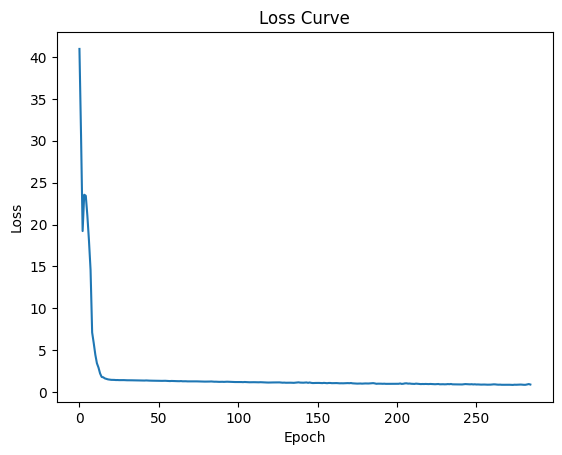

In [ ]:
sns.lineplot(x=range(len(ann.loss_curve_)), y=ann.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
accuracy = accuracy_score(target_test, target_pred)
cr = classification_report(target_test, target_pred)

print(f'Accuracy Score: {(accuracy * 100):.3f}%\n')
print('Classification Report:')
print(cr)

Accuracy Score: 71.729%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.41      0.58       123
           1       0.74      0.96      0.84       268
           2       0.00      0.00      0.00        37

   micro avg       0.77      0.72      0.74       428
   macro avg       0.57      0.46      0.47       428
weighted avg       0.74      0.72      0.69       428
 samples avg       0.72      0.72      0.72       428



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
